In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Matplotlib is building the font cache; this may take a moment.


In [4]:
#CSV file into pandas dataframe

data = pd.read_csv('Mall_Customers.csv')


In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
data = data.drop(['CustomerID', 'Gender', 'Age'], axis=1)


In [10]:
# Calculate WCSS for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

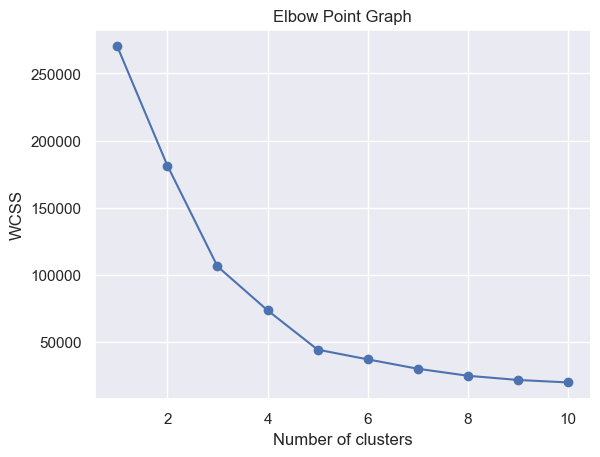

In [11]:
# Plotting the Elbow Method graph
sns.set()
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
# Calculate the first derivative of WCSS
first_derivative = np.diff(wcss)

# Calculate the second derivative of WCSS
second_derivative = np.diff(first_derivative)

# Find the index of the maximum second derivative
elbow_point = np.argmax(second_derivative) + 1  # Adding 1 because index starts at 0

print(f"The optimal number of clusters based on the Elbow Method is: {elbow_point}")

The optimal number of clusters based on the Elbow Method is: 2


In [13]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)

#return a label for each data point based on their cluster
y = kmeans.fit_predict(data)

print(y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


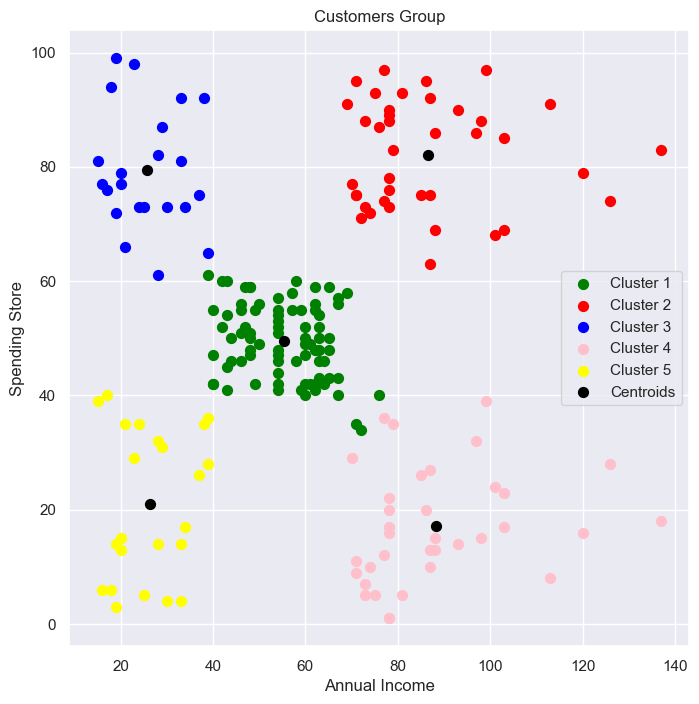

In [14]:
dataa = data.values
# Plotting the clusters and their centroids
plt.figure(figsize=(8, 8))
plt.scatter(dataa[y == 0, 0], dataa[y == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(dataa[y == 1, 0], dataa[y == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(dataa[y == 2, 0], dataa[y == 2, 1], s=50, c='blue', label='Cluster 3')
plt.scatter(dataa[y == 3, 0], dataa[y == 3, 1], s=50, c='pink', label='Cluster 4')
plt.scatter(dataa[y == 4, 0], dataa[y == 4, 1], s=50, c='yellow', label='Cluster 5')


centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=50, c='black', label='Centroids')

plt.title('Customers Group')
plt.xlabel('Annual Income')
plt.ylabel('Spending Store')
plt.legend()
plt.show()